**Idea:** For different initial conditions and "screen" shapes, how long & how many bounces does it take to get a corner hit?

* Starting with just mapping out a single point's movements over a screen, starting in the middle with a random starting angle:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

(2,)
[108.79533342  74.35382451]


(0.0, 101.0)

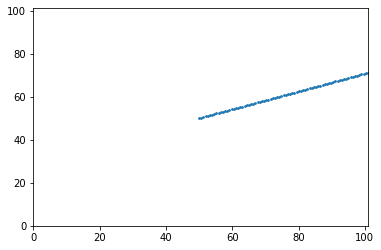

In [125]:
# creating a moving "cursor" by creating an initial position, veloctiy, and direction, then saving each coordinate in a stacked array

cursorpos_x, cursorpos_y = 50, 50
initial_vel = 1/np.sqrt(2) # how many 'pixels' it can move per 'time increment'
initial_direction = np.pi/8
cursorpos = np.array([[cursorpos_x, cursorpos_y]])[0]
print(cursorpos.shape)

for i in range(100):
    cursorpos_x += initial_vel*np.cos(initial_direction)
    cursorpos_y += initial_vel*np.sin(initial_direction)
    
    new_cursorpos = [cursorpos_x, cursorpos_y]
    
    cursorpos = np.dstack((cursorpos, new_cursorpos))
    
    
print(cursorpos[0, :, 90])
    
plt.scatter(cursorpos[0, 0], cursorpos[0, 1], s = 3)
plt.xlim([0, size]); plt.ylim([0, size])

(0.0, 101.0)

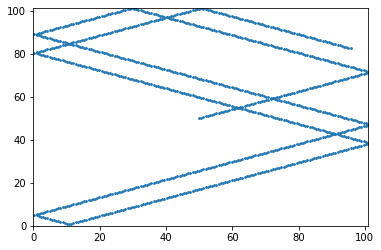

In [171]:
# Ok, now, what to do on a "side hit?" 

# I think I need a 'direction' indicator, which switches between 1, -1, and keep all angles between 0, pi/2 (?)
# it would also be nice to have functions for performing movements:

cursorpos_x, cursorpos_y = 50, 50
vel = 1/np.sqrt(2) # how many 'pixels' it can move per 'time increment'
angle = np.pi/8
cursorpos = np.array([[cursorpos_x, cursorpos_y]])[0]

x_direction = 1
y_direction = 1

def xmove(x, vel, angle, direction, size):
    x += direction * vel * np.cos(angle)
    if int(x) == 0 or int(x) == size:
        direction *= -1
    return x, direction

def ymove(y, vel, angle, direction, size):
    y += direction * vel * np.sin(angle)
    if int(y) == 0 or int(y) == size:
        direction *= -1
    return y, direction


for i in range(1000):
    cursorpos_x, x_direction = xmove(cursorpos_x, vel, angle, x_direction, size)
    cursorpos_y, y_direction = ymove(cursorpos_y, vel, angle, y_direction, size)
    
    new_cursorpos = [cursorpos_x, cursorpos_y]
    
    cursorpos = np.dstack((cursorpos, new_cursorpos))
    
plt.scatter(cursorpos[0, 0], cursorpos[0, 1], s = 3)
plt.xlim([0, size]); plt.ylim([0, size])





(1, 3, 31357)


(0.0, 1000.0)

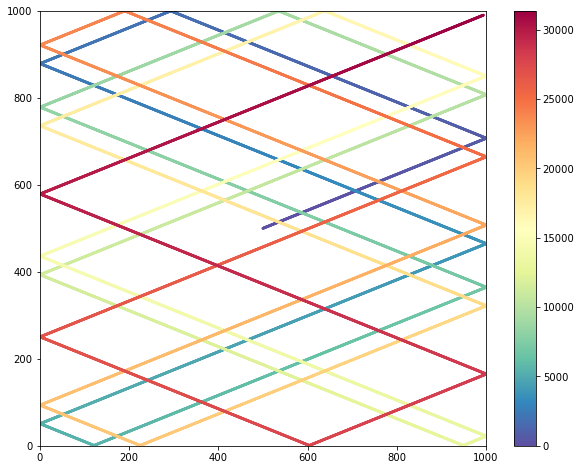

In [6]:
# Next, defining a "corner hit": I want it to be when it hits within 1% (?) of the corner (so 4 conditions, for each corner...)
size_x = 1000; size_y = 1000
x = 500; y = 500

def xmove(x, vel, angle, direction, size_x):
    x += direction * vel * np.cos(angle)
    if int(x) == 0 or int(x) == size_x:
        direction *= -1
    return x, direction

def ymove(y, vel, angle, direction, size_y):
    y += direction * vel * np.sin(angle)
    if int(y) == 0 or int(y) == size_y:
        direction *= -1
    return y, direction

def move(x, y, vel = 1/np.sqrt(2), angle = np.pi/8, x_direction=1, y_direction=1, size_x=100, size_y=100, margin = 1):
    cursorpos = np.array([[x, y, 0]])
    
    corner1_condition = np.abs(x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
    corner2_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
    corner3_condition = np.abs(x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
    corner4_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
    
    i = 0
    while not(corner1_condition or corner2_condition or corner3_condition or corner4_condition):
        
        corner1_condition = np.abs(x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
        corner2_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
        corner3_condition = np.abs(x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
        corner4_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
        
        x, x_direction = xmove(x, vel, angle, x_direction, size_x)
        y, y_direction = ymove(y, vel, angle, y_direction, size_y)
    
        new_cursorpos = [x, y, i]
    
        cursorpos = np.dstack((cursorpos, new_cursorpos))
        i += 1
        
    return cursorpos
        
cursorpos = move(x, y, size_x = size_x, size_y = size_y)    
print(cursorpos.shape)
    
plt.figure(figsize = [10, 8])
plt.scatter(cursorpos[0, 0], cursorpos[0, 1], c = cursorpos[0, 2], cmap = 'Spectral_r', s = 3); plt.colorbar()
plt.xlim([0, size_x]); plt.ylim([0, size_y])

In [2]:
def move_final(x=50, y=50, vel = 1/np.sqrt(2), angle = '', x_direction=1, y_direction=1, size_x=100, size_y=100, margin = 0.5):
    cursorpos = np.array([[x, y, 0]])
    if angle == '':
        angle = np.random.normal(np.pi/4, np.pi/8)
    
    time = 0
    bounces = 0
        
    def xmove(x, vel, angle, direction, size_x, bounces):
        x += direction * vel * np.cos(angle)
        if int(x) == 0 or int(x) == size_x:
            direction *= -1
            bounces += 1
        return x, direction, bounces

    def ymove(y, vel, angle, direction, size_y, bounces):
        y += direction * vel * np.sin(angle)
        if int(y) == 0 or int(y) == size_y:
            direction *= -1
            bounces += 1
        return y, direction, bounces
        
    print('Chosen angle: ' + str(angle * 180/np.pi) + 'º')
    print('Screen size: ' + str(size_x) + ', ' + str(size_y) + ' pix')
    print('Margin of error for corner hit: ' + str(margin) + '%')
    print('Running Simulation')
        
    corner1_condition = np.abs(x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
    corner2_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
    corner3_condition = np.abs(x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
    corner4_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
    
    while not(corner1_condition or corner2_condition or corner3_condition or corner4_condition):
        
        corner1_condition = np.abs(x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
        corner2_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
        corner3_condition = np.abs(x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
        corner4_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
        
        x, x_direction, bounces = xmove(x, vel, angle, x_direction, size_x, bounces)
        y, y_direction, bounces = ymove(y, vel, angle, y_direction, size_y, bounces)
    
        new_cursorpos = [x, y, time]
    
        cursorpos = np.dstack((cursorpos, new_cursorpos))
        time += 1
    print('It took ' + str(time) + ' time intervals and ' + str(bounces) + ' bounces before a corner hit!')
    
    print(cursorpos.shape)

    plt.figure(figsize = [10, 8])
    plt.scatter(cursorpos[0, 0], cursorpos[0, 1], c = cursorpos[0, 2], cmap = 'Spectral_r', s = 4); plt.colorbar()
    plt.xlim([0, size_x]); plt.ylim([0, size_y])

Chosen angle: 32.69761100170699º
Screen size: 100, 100 pix
Margin of error for corner hit: 0.5%
Running Simulation
It took 9493 time intervals and 94 bounces before a corner hit!
(1, 3, 9494)


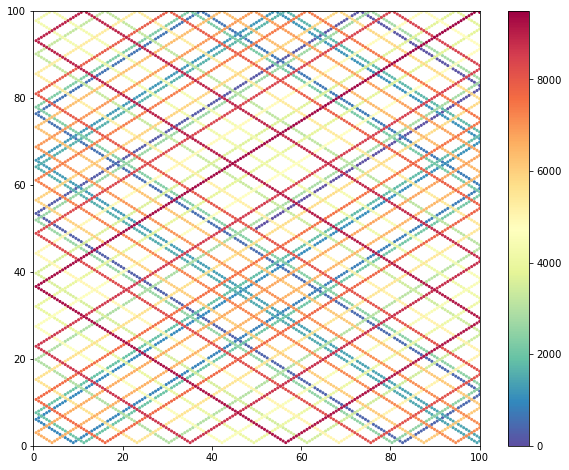

In [3]:
move_final()

In [4]:
from matplotlib.animation import FuncAnimation

**Next, animating it and saving it as a gif:**

I want to add some functionality to normalize the length of the gif, by first running it to find how many time intervals it takes, then running it again to save it as a gif (?)

In [29]:
%matplotlib widget 
# Use this option for other editors, like VSCode

#%matplotlib notebook 
# # Use this option for jupyter notebook

from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

def move_final_animate(x=50, y=50, vel = 1/np.sqrt(2), angle = '', x_direction=1, y_direction=1, size_x=100, size_y=100, margin = 1):
    cursorpos = np.array([[x, y, 0]])
    if angle == '':
        angle = np.random.normal(np.pi/4, np.pi/8)
    
    time = 0
    bounces = 0
        
    def xmove(x, vel, angle, direction, size_x, bounces):
        x += direction * vel * np.cos(angle)
        if int(x) == 0 or int(x) == size_x:
            direction *= -1
            bounces += 1
        return x, direction, bounces

    def ymove(y, vel, angle, direction, size_y, bounces):
        y += direction * vel * np.sin(angle)
        if int(y) == 0 or int(y) == size_y:
            direction *= -1
            bounces += 1
        return y, direction, bounces
        
    print('Chosen angle: ' + str(angle * 180/np.pi) + 'º')
    print('Screen size: ' + str(size_x) + ', ' + str(size_y) + ' pix')
    print('Margin of error for corner hit: ' + str(margin) + '%')
    print('Running Simulation')
        
    corner1_condition = np.abs(x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
    corner2_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
    corner3_condition = np.abs(x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
    corner4_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
    
    while not(corner1_condition or corner2_condition or corner3_condition or corner4_condition):
        
        corner1_condition = np.abs(x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
        corner2_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y) < (size_y * margin/100)
        corner3_condition = np.abs(x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
        corner4_condition = np.abs(x - size_x) < (size_x * margin/100) and np.abs(y - size_y) < (size_y * margin/100)
        
        x, x_direction, bounces = xmove(x, vel, angle, x_direction, size_x, bounces)
        y, y_direction, bounces = ymove(y, vel, angle, y_direction, size_y, bounces)
    
        new_cursorpos = [x, y, time]
    
        cursorpos = np.dstack((cursorpos, new_cursorpos))
        time += 1
        
    return cursorpos, angle, margin # other arguments are for titling graph, need to find better way to do this part

cursorpos, angle, margin = move_final_animate()
        
print('Total time:' + str(cursorpos.shape[2]))
print('Now running animation')

def truncate(num, digits):
    num = int(num * 10**digits)/(10**digits)
    return num

    

fig, ax = plt.subplots()
line, = ax.plot([])

ax.set_title("Initial Starting Angle: " + str(truncate((angle * 180/np.pi), 3)) + "º , Margin of Error: " + str(margin) + "%")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticklabels([])
ax.set_yticklabels([])

def animate(frame_num):
    x = cursorpos[0,0,frame_num-20:frame_num]
    y = cursorpos[0,1,frame_num-20:frame_num]
    
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames = cursorpos.shape[2], interval=1)

f= r"/Volumes/EDRIVE/Fall_2021/misc/scripts/outputs/gif_tests/screensaver.gif"
writergif = PillowWriter(fps=100)
anim.save(f, writer=writergif)
#plt.show()

Chosen angle: 62.91266867822369º
Screen size: 100, 100 pix
Margin of error for corner hit: 1%
Running Simulation
Total time:3557
Now running animation


<IPython.core.display.Javascript object>

### Now that it's working, a couple things to add in the future:
- an abort feature if simulations take longer then ~10000 frames (this one should be easy)
- better appearance, including better cursor marker and screen
- different shapes of screen (triangle, star, etc...)
- better optimization 